# Training

In [8]:
import tensorflow as tf
import tensorflow.keras as keras
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices: tf.config.experimental.set_memory_growth(device, True)
from nsp.model import create_model, only_recurrent_model

In [ ]:
%%time
EMB_SIZE=2
# len(X_train) % batch_size deve essere 0 nel caso in cui si presenta l'errore InternalError: Failed to call ThenRnnForward with model config:
batch_size = 600

model = only_recurrent_model(WINDOW, EMB_SIZE, learning_rate=0.0005, output_size=FORECAST, batch_size=batch_size)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=500, min_lr=0.0000001, verbose=0) lr 10e-5
#checkpointer = ModelCheckpoint(filepath="test_normalizzato.hdf5", verbose=2, save_best_only=True)
import datetime
pars = "10Kdata_4096N_batch600"
log_folder = "./log/" + pars #+ "_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tbCallBack = keras.callbacks.TensorBoard(log_dir=log_folder, update_freq='epoch', profile_batch=0)
history = model.fit(X_train, Y_train, 
              epochs = 1500, 
              batch_size = batch_size, 
              verbose=2, 
              validation_data=(X_test, Y_test),
              callbacks=[tbCallBack], #checkpointer, reduce_lr
              shuffle=True)

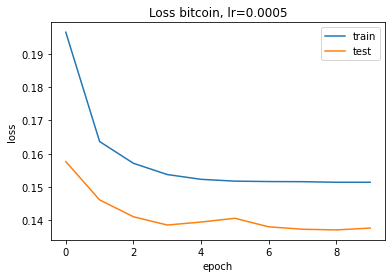

In [32]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss bitcoin, lr=0.0005')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig('lr_0.0005_reduce-lr_model_big1.jpg')
plt.show()

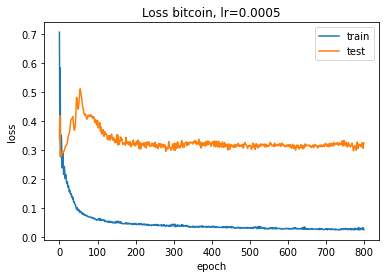

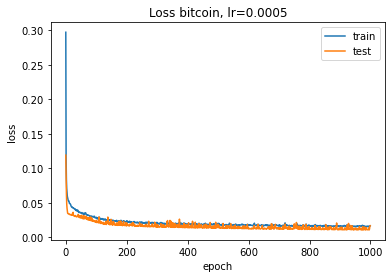

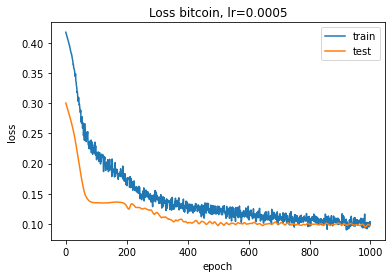

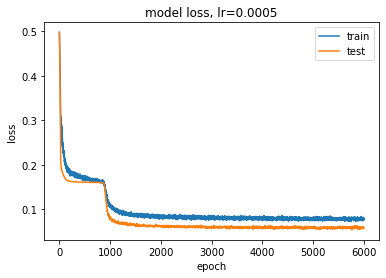

In [254]:
# Save the weight and architecture of the neural network
model.save_weights('weights_forecast3.h5', overwrite=True)
model.save('model_forecast3.h5', overwrite=True)

In [ ]:
# Save the network architecture in JSON format
model_json = model.to_json()
json_file = open("test.json", "w")
json_file.write(model_json)
json_file.close()